<a href="https://colab.research.google.com/github/bilalProgTech/mtech-nmims/blob/master/deep-learning/Lab-Work/20220828-Lab-5-MTech-DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple RNN

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
rnn_units = 2
tf.keras.backend.clear_session()
rnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3, 1)),
    tf.keras.layers.SimpleRNN(rnn_units, activation='tanh'),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 8         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
wx = rnn_model.get_weights()[0]
wh = rnn_model.get_weights()[1]
bh = rnn_model.get_weights()[2]
wy = rnn_model.get_weights()[3]
by = rnn_model.get_weights()[4]

In [ ]:
wx

array([[ 0.14835858, -0.95762897]], dtype=float32)

In [ ]:
wh

array([[-0.42661095, -0.9044353 ],
       [ 0.9044353 , -0.4266109 ]], dtype=float32)

In [ ]:
wy

array([[0.03701544],
       [0.76743925]], dtype=float32)

In [ ]:
bh

array([0., 0.], dtype=float32)

In [ ]:
by

array([0.], dtype=float32)

In [ ]:
x = np.array([[1, 2, 3], [3, 4, 5]])
x_input = np.reshape(x,(-1, 3, 1))
model_yhat = rnn_model.predict(x_input)
model_yhat

array([[-0.753049 ],
       [-0.7657723]], dtype=float32)

In [ ]:
h0 = np.zeros(rnn_units)
h1 = np.tanh(np.dot(x_input[:,0], wx) + h0 + bh)
h2 = np.tanh(np.dot(x_input[:,1], wx) + np.dot(h1,wh) + bh)
h3 = np.tanh(np.dot(x_input[:,2], wx) + np.dot(h2,wh) + bh)
yhat = np.dot(h3, wy) + by
yhat

array([[-0.75304899],
       [-0.76577225]])

# Tokenization and Pad Sequences

In [ ]:
import tensorflow as tf

In [ ]:
sentences = [
    'i love deeplearning',
    'I, love ai',
    'You love deeplearning!',
    'You think deeplearning is amazing'
]

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'love': 1, 'deeplearning': 2, 'i': 3, 'you': 4, 'ai': 5, 'think': 6, 'is': 7, 'amazing': 8}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[3, 1, 2], [3, 1, 5], [4, 1, 2], [4, 6, 2, 7, 8]]

In [ ]:
test_sentences = [
    'i really love deeplearning',
    'ai is amazing and good'
]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences

[[3, 1, 2], [5, 7, 8]]

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'love': 2, 'deeplearning': 3, 'i': 4, 'you': 5, 'ai': 6, 'think': 7, 'is': 8, 'amazing': 9}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[4, 2, 3], [4, 2, 6], [5, 2, 3], [5, 7, 3, 8, 9]]

In [ ]:
test_sentences = [
    'i really love deeplearning',
    'ai is amazing and good'
]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences

[[4, 1, 2, 3], [6, 8, 9, 1, 1]]

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences)
padded

array([[0, 0, 4, 2, 3],
       [0, 0, 4, 2, 6],
       [0, 0, 5, 2, 3],
       [5, 7, 3, 8, 9]], dtype=int32)

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')
padded

array([[4, 2, 3, 0, 0],
       [4, 2, 6, 0, 0],
       [5, 2, 3, 0, 0],
       [5, 7, 3, 8, 9]], dtype=int32)

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=4)
padded

array([[4, 2, 3, 0],
       [4, 2, 6, 0],
       [5, 2, 3, 0],
       [7, 3, 8, 9]], dtype=int32)

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=4, truncating='post')
padded

array([[4, 2, 3, 0],
       [4, 2, 6, 0],
       [5, 2, 3, 0],
       [5, 7, 3, 8]], dtype=int32)

# Embeddings

In [ ]:
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

In [ ]:
sentiments = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [ ]:
word_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
word_tokenizer.fit_on_texts(corpus)
word_index = word_tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'movie': 2, 'it': 3, 'is': 4, 'the': 5, 'i': 6, 'was': 7, 'like': 8, 'a': 9, 'fantastic': 10, 'horrible': 11, 'acting': 12, 'pathetic': 13, 'not': 14, 'this': 15, 'an': 16, 'excellent': 17, 'move': 18, 'you': 19, 'should': 20, 'watch': 21, 'brilliant': 22, 'exceptionally': 23, 'good': 24, 'wonderfully': 25, 'directed': 26, 'and': 27, 'executed': 28, 'its': 29, 'series': 30, 'never': 31, 'watched': 32, 'such': 33, 'brillent': 34, 'wonderful': 35, 'waste': 36, 'of': 37, 'money': 38, 'picture': 39, 'very': 40, 'boring': 41, 'did': 42, 'will': 43, 'recommend': 44}


In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

45

In [ ]:
embedded_sequences = word_tokenizer.texts_to_sequences(corpus)
print(embedded_sequences)

[[15, 4, 16, 17, 2], [5, 18, 7, 10, 6, 8, 3], [19, 20, 21, 3, 4, 22], [23, 24], [25, 26, 27, 28, 6, 8, 3], [29, 9, 10, 30], [31, 32, 33, 9, 34, 2], [3, 4, 9, 35, 2], [11, 12], [36, 37, 38], [13, 39], [3, 7, 40, 41], [6, 42, 14, 8, 5, 2], [5, 2, 7, 11], [6, 43, 14, 44], [5, 12, 4, 13]]


In [ ]:
longest_sentence = len(max(embedded_sequences, key=len))
padded_sentences = tf.keras.preprocessing.sequence.pad_sequences(embedded_sequences, maxlen=longest_sentence, padding='post')
print(padded_sentences)

[[15  4 16 17  2  0  0]
 [ 5 18  7 10  6  8  3]
 [19 20 21  3  4 22  0]
 [23 24  0  0  0  0  0]
 [25 26 27 28  6  8  3]
 [29  9 10 30  0  0  0]
 [31 32 33  9 34  2  0]
 [ 3  4  9 35  2  0  0]
 [11 12  0  0  0  0  0]
 [36 37 38  0  0  0  0]
 [13 39  0  0  0  0  0]
 [ 3  7 40 41  0  0  0]
 [ 6 42 14  8  5  2  0]
 [ 5  2  7 11  0  0  0]
 [ 6 43 14 44  0  0  0]
 [ 5 12  4 13  0  0  0]]


In [ ]:
embedding_dim = 4
tf.keras.backend.clear_session()
embedding_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence, name='embedding'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
embedding_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
embedding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 4)              180       
                                                                 
 flatten (Flatten)           (None, 28)                0         
                                                                 
 dense (Dense)               (None, 1)                 29        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = embedding_model.fit(padded_sentences, sentiments, epochs=50, verbose=0)

In [ ]:
embedding_model.evaluate(padded_sentences, sentiments)

1/1 [==============================] - 0s 255ms/step - loss: 0.6057 - accuracy: 1.0000


[0.6056910157203674, 1.0]

In [ ]:
emb_weights = embedding_model.get_weights()[0]
len(emb_weights)

45

In [ ]:
emb_weights[16]

array([ 0.07588314,  0.03875135, -0.03181843, -0.05674741], dtype=float32)

In [ ]:
emb_weights[23]

array([-0.02335124,  0.09423881, -0.02501249,  0.08551799], dtype=float32)

In [ ]:
emb_weights[35]

array([-0.00870124, -0.07178598,  0.07398051,  0.00405721], dtype=float32)

# Simple RNN for NLP

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.set_option("display.max_colwidth", 200) 

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/bilalProgTech/nlp-projects/master/Sarcasm-Detector/train.csv')
data = data.drop(['Id'], axis=1)
data.head()

,label,text
0,0,@Estrada21Karla Happy Happy Birthday Mommy Karla ng lahat.. hehehe.. Thank you for always there to us. I Love You po. Hope you notice it.
1,0,"Thank you Sabrina, great talk on timeless connections and architecture, and Freya Sykes who taught us about the Sami people #SSCA2015"
2,0,"Really not looking forward to tomorrow. I'm not into this whole "" dress up day "" thing at all."
3,1,Miley and Liam's relationship in the last song is perfect. 😍😥 #sarcasm
4,1,"What doesn't kill you makes you stronger. "" What if I cut off your left leg, would that make you stronger. Would it. #sarcasm"


In [ ]:
data["label"].value_counts(normalize=True)

0    0.538448
1    0.461552
Name: label, dtype: float64

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_nonenglish(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

def remove_handles(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def clean_text(text):
    text = remove_handles(text, '@[\w]*')
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub("http\S+|www.\S+","", text)
    text = text.lower()
    text = ' '.join([w for w in text.split() if len(w)>=2])
    text = remove_stopwords(text)
    text = remove_nonenglish(text)
    words = text.split()
    text = " ".join(sorted(set(words), key=words.index))
    return text

In [ ]:
data['clean_text'] = data['text'].apply(lambda x: clean_text(x))
data.head()

,label,text,clean_text
0,0,@Estrada21Karla Happy Happy Birthday Mommy Karla ng lahat.. hehehe.. Thank you for always there to us. I Love You po. Hope you notice it.,happy birthday mommy thank always us love po hope notice
1,0,"Thank you Sabrina, great talk on timeless connections and architecture, and Freya Sykes who taught us about the Sami people #SSCA2015",thank great talk timeless architecture taught us people
2,0,"Really not looking forward to tomorrow. I'm not into this whole "" dress up day "" thing at all.",really looking forward tomorrow whole dress day thing
3,1,Miley and Liam's relationship in the last song is perfect. 😍😥 #sarcasm,relationship last song perfect sarcasm
4,1,"What doesn't kill you makes you stronger. "" What if I cut off your left leg, would that make you stronger. Would it. #sarcasm",doesnt kill cut left leg would make sarcasm


In [ ]:
from wordcloud import WordCloud

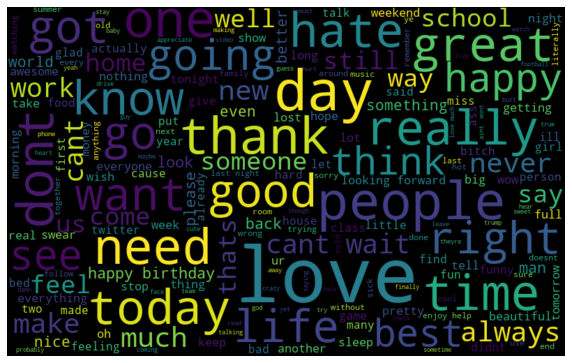

In [ ]:
all_words = ' '.join([text for text in data[data['label']==0]['clean_text']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=12)
train.shape, test.shape

((18424, 3), (4607, 3))

In [ ]:
y_train = train['label']
y_test = test['label']

In [ ]:
train_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
train_tokenizer.fit_on_texts(train['clean_text'].values)
train_word_index = train_tokenizer.word_index
print(train_word_index)

{'<OOV>': 1, 'sarcasm': 2, 'love': 3, 'like': 4, 'dont': 5, 'get': 6, 'day': 7, 'people': 8, 'one': 9, 'good': 10, 'cant': 11, 'great': 12, 'know': 13, 'really': 14, 'time': 15, 'go': 16, 'much': 17, 'life': 18, 'want': 19, 'back': 20, 'school': 21, 'need': 22, 'happy': 23, 'today': 24, 'going': 25, 'hate': 26, 'wait': 27, 'best': 28, 'think': 29, 'got': 30, 'see': 31, 'make': 32, 'would': 33, 'work': 34, 'never': 35, 'someone': 36, 'right': 37, 'always': 38, 'sleep': 39, 'ever': 40, 'say': 41, 'even': 42, 'thats': 43, 'fun': 44, 'still': 45, 'night': 46, 'home': 47, 'nothing': 48, 'getting': 49, 'come': 50, 'well': 51, 'last': 52, 'thank': 53, 'could': 54, 'way': 55, 'better': 56, 'thanks': 57, 'new': 58, 'look': 59, 'class': 60, 'first': 61, 'feel': 62, 'thing': 63, 'every': 64, 'tomorrow': 65, 'morning': 66, 'take': 67, 'oh': 68, 'something': 69, 'person': 70, 'long': 71, 'girl': 72, 'phone': 73, 'nice': 74, 'bed': 75, 'week': 76, 'ill': 77, 'us': 78, 'next': 79, 'man': 80, 'please'

In [ ]:
vocab_length = len(train_word_index) + 1
vocab_length

7580

In [ ]:
train_sequences = train_tokenizer.texts_to_sequences(train['clean_text'].values)
len(train_sequences)

18424

In [ ]:
test_sequences = train_tokenizer.texts_to_sequences(test['clean_text'].values)
len(test_sequences)

4607

In [ ]:
longest_sentence = len(max(train_sequences, key=len))
train_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=longest_sentence, truncating='post')
test_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=longest_sentence, truncating='post')

In [ ]:
longest_sentence

18

In [ ]:
vocab_length

7580

In [ ]:
embedding_dim = 4
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, 
                              input_length=longest_sentence),
    tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='tanh'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 18, 4)             30320     
                                                                 
 simple_rnn (SimpleRNN)      (None, 18, 64)            4416      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 38,657
Trainable params: 38,657
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_padded_seqeunces, y_train, epochs=10, 
                    validation_data=(test_padded_seqeunces, y_test))

Epoch 1/10
576/576 [==============================] - 23s 37ms/step - loss: 0.1057 - accuracy: 0.9550 - val_loss: 0.0175 - val_accuracy: 0.9957
Epoch 2/10
576/576 [==============================] - 21s 36ms/step - loss: 0.0136 - accuracy: 0.9977 - val_loss: 0.0119 - val_accuracy: 0.9983
Epoch 3/10
576/576 [==============================] - 23s 40ms/step - loss: 0.0132 - accuracy: 0.9975 - val_loss: 0.0142 - val_accuracy: 0.9970
Epoch 4/10
576/576 [==============================] - 23s 40ms/step - loss: 0.0118 - accuracy: 0.9978 - val_loss: 0.0287 - val_accuracy: 0.9931
Epoch 5/10
576/576 [==============================] - 22s 38ms/step - loss: 0.0131 - accuracy: 0.9974 - val_loss: 0.0111 - val_accuracy: 0.9980
Epoch 6/10
576/576 [==============================] - 22s 37ms/step - loss: 0.0114 - accuracy: 0.9979 - val_loss: 0.0123 - val_accuracy: 0.9980
Epoch 7/10
576/576 [==============================] - 22s 38ms/step - loss: 0.0104 - accuracy: 0.9979 - val_loss: 0.0134 - val_accuracy:

In [ ]:
model.evaluate(test_padded_seqeunces, y_test)

144/144 [==============================] - 1s 5ms/step - loss: 0.0119 - accuracy: 0.9976


[0.011870388872921467, 0.9976123571395874]

In [ ]:
test_prob = model.predict(test_padded_seqeunces)
test_pred = np.where(test_prob > 0.5, 1, 0)

In [ ]:
accuracy_score(y_test, test_pred)

0.9976123290644671

In [ ]:
confusion_matrix(y_test, test_pred)

array([[2537,    8],
       [   3, 2059]])